<a href="https://colab.research.google.com/github/charlie-markowitz-YSE/International_Finance/blob/main/Tariffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing packages 

from plotnine import *
import plotnine
import pandas as pd
import numpy as np
from mizani.formatters import scientific_format, percent_format, currency_format
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [2]:
#reading in my data
gni = pd.read_csv('https://raw.githubusercontent.com/charlie-markowitz-YSE/International_Finance2/main/GNI.csv')
region = pd.read_csv('https://raw.githubusercontent.com/charlie-markowitz-YSE/International_Finance2/main/Region.csv')
tariff_rate = pd.read_csv('https://raw.githubusercontent.com/charlie-markowitz-YSE/International_Finance2/main/TariffRate.csv')

In [3]:
gni.head()

,Country_Name,Country_Code,GNI
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,1364.796122
2,Afghanistan,AFG,500.000000
3,Africa Western and Central,AFW,1646.334568
4,Angola,AGO,2230.000000


In [4]:
region.head()

,Economy,Code,Region
0,Aruba,ABW,Latin America & Caribbean
1,Afghanistan,AFG,South Asia
2,Angola,AGO,Sub-Saharan Africa
3,Albania,ALB,Europe & Central Asia
4,Andorra,AND,Europe & Central Asia


In [5]:
tariff_rate.head()

,Country_Name,Weighted_mean_tariff
0,Afghanistan,8.4
1,Albania,1.5
2,Algeria,12.5
3,American Samoa,..
4,Andorra,..


In [6]:
tariff_rate.replace("..", np.nan, inplace = True)
region.replace("..", np.nan, inplace = True)
gni.replace("..", np.nan, inplace = True)

In [7]:
tariff_rate = tariff_rate.dropna()
region = region.dropna()
gni = gni.dropna()

In [8]:
df_merge = tariff_rate.merge(region, how = 'left', left_on = 'Country_Name', right_on='Economy')

In [9]:
df_merge.head()

,Country_Name,Weighted_mean_tariff,Economy,Code,Region
0,Afghanistan,8.4,Afghanistan,AFG,South Asia
1,Albania,1.5,Albania,ALB,Europe & Central Asia
2,Algeria,12.5,Algeria,DZA,Middle East & North Africa
3,Angola,8.7,Angola,AGO,Sub-Saharan Africa
4,Antigua and Barbuda,12.4,Antigua and Barbuda,ATG,Latin America & Caribbean


In [10]:
df = df_merge.merge(gni, how = 'left', on = 'Country_Name')

In [11]:
df = df.dropna()

In [12]:
df

,Country_Name,Weighted_mean_tariff,Economy,Code,Region,Country_Code,GNI
0,Afghanistan,8.4,Afghanistan,AFG,South Asia,AFG,500.0
1,Albania,1.5,Albania,ALB,Europe & Central Asia,ALB,5210.0
2,Algeria,12.5,Algeria,DZA,Middle East & North Africa,DZA,3550.0
3,Angola,8.7,Angola,AGO,Sub-Saharan Africa,AGO,2230.0
4,Antigua and Barbuda,12.4,Antigua and Barbuda,ATG,Latin America & Caribbean,ATG,14250.0
...,...,...,...,...,...,...,...
179,Vanuatu,10.1,Vanuatu,VUT,East Asia & Pacific,VUT,2780.0
181,Vietnam,5.7,Vietnam,VNM,East Asia & Pacific,VNM,2660.0
182,West Bank and Gaza,1.9,West Bank and Gaza,PSE,Middle East & North Africa,PSE,3710.0
184,Zambia,10.8,Zambia,ZMB,Sub-Saharan Africa,ZMB,1190.0


In [13]:
df['GNI'] = df.GNI.astype('int64')

In [14]:
df['Weighted_mean_tariff'] =df.Weighted_mean_tariff.astype('float')

In [24]:
pd.set_option('display.max_rows', 150)
print(df)

                       Country_Name  Weighted_mean_tariff  ... Country_Code    GNI
0                       Afghanistan                   8.4  ...          AFG    500
1                           Albania                   1.5  ...          ALB   5210
2                           Algeria                  12.5  ...          DZA   3550
3                            Angola                   8.7  ...          AGO   2230
4               Antigua and Barbuda                  12.4  ...          ATG  14250
5                         Argentina                  12.2  ...          ARG   8930
6                           Armenia                   6.3  ...          ARM   4220
8                         Australia                   2.0  ...          AUS  53730
10                       Azerbaijan                  15.3  ...          AZE   4450
11                      Bahamas The                  23.7  ...          BHS  27780
13                       Bangladesh                  12.2  ...          BGD   2010
14  

In [16]:
usa= {'Region': ['United States'],
         'Weighted_mean_tariff': [8.7],
      'GNI': [65910]}
usa_df = pd.DataFrame(data=usa)
usa_df

,Region,Weighted_mean_tariff,GNI
0,United States,8.7,65910


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning:

Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it



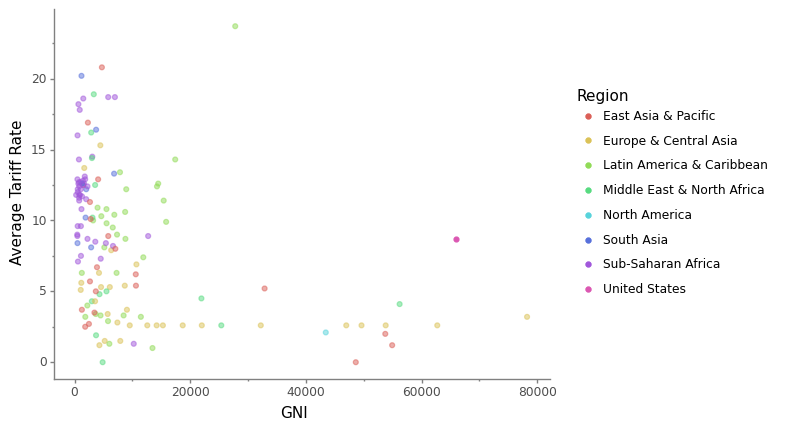

<ggplot: (8768169401529)>

In [22]:

(
 ggplot(df, aes(x='GNI', y='Weighted_mean_tariff', color='Region'))
+ geom_point(alpha = 5/10)
+ geom_point(usa_df, aes(x = 'GNI', y = 'Weighted_mean_tariff'))
 + ylab("Average Tariff Rate")
 + xlab("GNI") 
 + ggtitle("")
 + theme_classic()
 + theme(axis_line=element_line(color="gray"),
      axis_ticks=element_line(color = "gray")) 
)
